# ML in Cybersecurity: Project I

## Team
  * **Team name**:  $Mittwoch$
  * **Members**:  Vilém Zouhar (vilem.zouhar@gmail.com), Philipp Zimmermann (s8phzimm@stud.uni-saarland.de) and Alina Leippert (alle00002@stud.uni-saarland.de)

## Logistics
  * **Due date**: 29th November 2020, 23:59:59 (email the completed notebook to mlcysec_ws2021_staff@lists.cispa.saarland)
  * Complete this in **teams of 3**
  * Feel free to use the course [mailing list](https://lists.cispa.saarland/listinfo/mlcysec_ws2021_stud) to find group members.
  
## Timeline
  * 16-Nov-2020: Project 1 hand-out
  * **29-Nov-2020** (23:59:59): Email the completed notebook to mlcysec_ws2021_staff@lists.cispa.saarland
  * 30-Nov-2020: Project 1 discussion and summary
  
## About this Project
In this project, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 21 in the [second](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf) lecture. Within this framework, the following blocks of this project are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this project will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
  
 A note on (1.): 
  * Choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!

## Grading Details
 * 5 points for loading and visualization 
 * 25x3 points for models. Per model:
   * 4 points for written description 
   * 7 points for implementation
   * 7 points for evaluation
   * 7 points for summary
 * 15 points for final summary (Section 3)
 * 5 points for clean code
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.


**The notebook is your project report. So, to make the report readable, omit code for techniques/models/things that did not work. You can use final summary to provide report about these codes.**

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v2.0: Added pytorch
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---


  ## Work

- __Data loading and visualisation__: Vilda
- __Model 1__: Alina
- __Model 2__: Philipp
- __Model 3__: Vilda
- __Summary__: Philipp, Alina, Vilda

In [ ]:
#@title
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [ ]:
#@title
import torch, torchvision
from torch import nn
from torchvision import transforms
import sklearn
import PIL
import random

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import confusion_matrix, classification_report

Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [ ]:
#@title

def vis_predictions(x_eval, y_eval, y_pred, n_val):
    rows, cols = 4, 3

    fig,ax = plt.subplots(nrows = rows, ncols = cols)

    ids = np.random.randint(0,n_val,rows*cols)
    for i in range(cols):   
        for j in range(rows):
            ax[j][i].set_title(f'Correct: {y_eval[ids[(i*rows)+j]]}, Predicted: {y_pred[ids[(i*rows)+j]]}')
            two_d = (np.reshape(x_eval[ids[(i*rows)+j]], (28, 28))).astype(np.uint8)
            ax[j][i].imshow(two_d)
            ax[j][i].axes.get_xaxis().set_visible(False)
            ax[j][i].axes.get_yaxis().set_visible(False)


    plt.tight_layout()  

# 1. Loading and Visualizing data (5 points)

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist).
  
  
  In either case, it is important that you have disjoint trainval and test splits!

In [ ]:
torch.manual_seed(0)
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,)),
])

VALIDATION_FRAC = 0.40

data_train = list(torchvision.datasets.MNIST('.', train=True, download=True, transform=transform))
data_test  = list(torchvision.datasets.MNIST('.', train=False, download=True, transform=transform))

random.seed(0)
random.shuffle(data_test)
data_valid = data_test[:int(len(data_test)*VALIDATION_FRAC)]
data_test  = data_test[int(len(data_test)*VALIDATION_FRAC):]

# DEBUG: remove this for final training
# DEBUG_FRAC = 0.20
# data_train = data_train[:int(len(data_train)*DEBUG_FRAC)]

# Data loaded as tuples of a PIL image and label
print(f'len(data_train) = {len(data_train)}')
print(f'len(data_valid) = {len(data_valid)}')
print(f'len(data_test)  = {len(data_test)}')


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw





Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)



len(data_train) = 60000
len(data_valid) = 4000
len(data_test)  = 6000


## 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 4, [Lecture 2](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

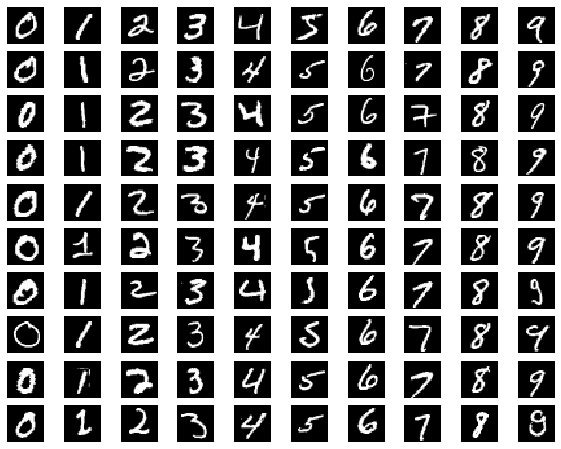

In [ ]:
rows, cols = 10, 10
fig, ax = plt.subplots(nrows = rows, ncols = cols)

for col in range(cols):
  imgs = [img for (img, label) in data_train if label == col][:rows]
  for row in range(rows):
    ax[row][col].imshow(imgs[row].numpy().squeeze())
    ax[row][col].set_axis_off()

plt.savefig('fig1.pdf')
plt.show()

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.1: Model [M1]: Support Vector Machine (25 points)

Classifying MNIST data with a Support Vector Machine using SKlearn. Based on [1](https://towardsdatascience.com/support-vector-machine-mnist-digit-classification-with-python-including-my-hand-written-digits-83d6eca7004a) and [2](https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/) on MNIST classification and SVM hyperparamater tuning, and StackOverflow [question](https://stackoverflow.com/questions/48390601/explicitly-specifying-test-train-sets-in-gridsearchcv).

### 2.1.1: Hyper-parameters

Since SVM training on the whole dataset takes quite long, it is made possible to choose here whether to train on a subset (10% of the dataset) or on the whole dataset.
Doing GridSearchCV for finding the best params for the SVM is possible for subset training, but Colab collapses when performing that on the whole dataset.
The best parameters found from GridSearch on the subset are provided here when  training is set to the whole dataset.

In [ ]:
# enable training on smaller portion of the data to use GridSearch 
train_on_subset = True  # set to False to train on whole dataset, set to True to train on 10% of the data

# SVM parameters for GridSearchCv
parameters = {'SVM__C':[0.01,0.1, 1], 'SVM__gamma':[0.1,0.01,0.001], 'SVM__kernel':['rbf','linear','poly','sigmoid']}

### 2.1.2: Data Preprocessing


In [ ]:
# shuffle data
random.seed(42)
random.shuffle(data_train)
random.shuffle(data_valid)

# reshape image tensors to two dimensions (from [1,28,28] to [28,28]) and flatten to get 2d array of shape (60000, 784)
x_train_data = [d[0].resize_([28,28]).flatten() for d in data_train]
y_train_data = [d[1] for d in data_train]
x_val_data = [d[0].resize_([28,28]).flatten() for d in data_valid]
y_val_data = [d[1] for d in data_valid]
x_test_data = [d[0].resize_([28,28]).flatten() for d in data_test]
y_test_data = [d[1] for d in data_test]

# convert tensors/lists to numpy array
x_train = np.array([t.numpy() for t in x_train_data])
x_val = np.array([t.numpy() for t in x_val_data])
x_test = np.array([t.numpy() for t in x_test_data])
y_train = np.array(y_train_data)
y_val = np.array(y_val_data)
y_test = np.array(y_test_data)

In [ ]:
# train on 10% of the dataset
x_train_small = x_train[0:6000]
y_train_small = y_train[0:6000]
x_val_small = x_val[0:250]
y_val_small = y_val[0:250]

x_train_val = np.concatenate((x_train_small, x_val_small), axis=0)
y_train_val = np.concatenate((y_train_small, y_val_small), axis=0)

# set up testing on validation data for grid search
# indices with value -1 are kept in train
train_indices_small = np.full((6000,), -1, dtype=int)
# indices with zero value are kept in test for GridSearchCV
val_indices_small = np.full((250,), 0, dtype=int)

val_fold = np.append(train_indices_small, val_indices_small)

### 2.1.3: Model

Define your model here

In [ ]:
steps = [('scaler', StandardScaler()), ('SVM',SVC())]
pipeline = Pipeline(steps) # define Pipeline object

# testing GridSearch on validation set instead of cross validating on training set
ps = PredefinedSplit(val_fold)
print(ps.get_n_splits()) # num splits; output should be 1

grid = GridSearchCV(pipeline, param_grid=parameters, cv=ps, n_jobs=-1, return_train_score=True)

1


### 2.1.4: Fit Model

Define optimization procedure and fit your model to the data

In [ ]:
_ = grid.fit(x_train_val, y_train_val)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVM',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, sh

Average fit time: 33.08s
Average inference time: 1.15s


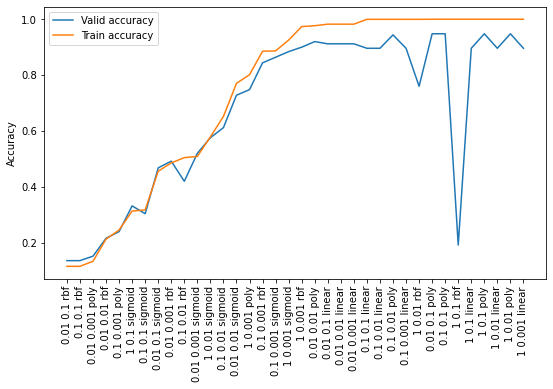

In [ ]:
# print(grid.cv_results_)
fig = plt.figure(figsize=(9,5))
paramaxis = [f"{x['SVM__C']} {x['SVM__gamma']} {x['SVM__kernel']}" for x in grid.cv_results_['params']]
sortperm = list(range(len(paramaxis)))
sortperm.sort(key=lambda x: grid.cv_results_['mean_train_score'][x])
paramaxis = [paramaxis[s] for s in sortperm]

acc_test_sorted = [grid.cv_results_['mean_test_score'][s] for s in sortperm]
acc_train_sorted = [grid.cv_results_['mean_train_score'][s] for s in sortperm]
plt.plot(acc_test_sorted, label='Valid accuracy')
plt.plot(acc_train_sorted, label='Train accuracy')
plt.legend()
plt.ylabel('Accuracy')
_ = plt.xticks(range(len(paramaxis)), paramaxis, rotation ='vertical')

print(f'Average fit time: {np.average(grid.cv_results_["mean_fit_time"]):.2f}s')
print(f'Average inference time: {np.average(grid.cv_results_["mean_score_time"]):.2f}s')

### 2.1.5: Evaluation

<!-- Evaluate your model.
  * Evaluate models with different parameters 
  * Plot the score (accuracy) for each model using "plot_scores" function
  * Report score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions -->

There is no concept of epoch training nor gradients in GridSearch. The training instances are independent. In order to make the results legible, we sorted the instances in ascending order of train accuracy. Interestingly enough, multiple hyperparameters fitted the training data perfectly. We chose one of them:

```
SVM__C: 0.01, SVM__gamma: 0.1, SVM__kernel: poly
```

and used this for all data.

In [ ]:
print("Fitting on the best valid data parameters:", grid.best_params_)
parameters = {'SVM__C':[0.01], 'SVM__gamma':[0.1], 'SVM__kernel':['poly']}

x_train_val = np.concatenate((x_train, x_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
# indices with value -1 are kept in train
train_indices = np.full((60000,), -1, dtype=int)
# indices with zero value are kept in test for GridSearchCV
val_indices = np.full((2500,), 0, dtype=int)
val_fold = np.append(train_indices, val_indices)

steps = [('scaler', StandardScaler()), ('SVM',SVC())]
pipeline = Pipeline(steps)
ps = PredefinedSplit(val_fold)

gridF = GridSearchCV(pipeline, param_grid=parameters, cv=ps, n_jobs=-1, return_train_score=True)

_ = gridF.fit(x_train_val, y_train_val)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVM',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, sh

In [ ]:
print(f"Final train accuracy: {gridF.cv_results_['mean_train_score'][0]*100:.2f}%")
print(f"Final valid accuracy: {gridF.cv_results_['mean_test_score'][0]*100:.2f}%")
print(f'Final fit time: {np.average(gridF.cv_results_["mean_fit_time"]):.2f}s')
print(f'Final inference time: {np.average(gridF.cv_results_["mean_score_time"]):.2f}s')

Final train accuracy: 100.00%
Final valid accuracy: 97.92%
Final fit time: 872.84s
Final inference time: 40.87s


Final test accuracy: 98.03%


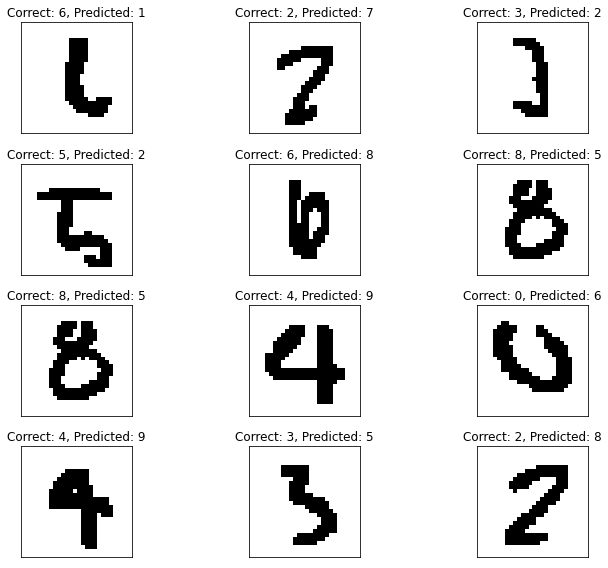

In [ ]:
print(f"Final test accuracy: {gridF.score(x_test, y_test)*100:.2f}%")
y_pred = gridF.predict(x_test)
index_bad = [i for i in range(len(y_pred)) if y_test[i] != y_pred[i]]
y_pred_bad =  [y_pred[i] for i in index_bad]
y_test_bad =  [y_test[i] for i in index_bad]
x_test_bad =  [x_test[i] for i in index_bad]
vis_predictions(x_test_bad, y_test_bad, y_pred_bad, len(x_test_bad))

### 2.1.6: Summary
<!-- 
Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 * What were other design choices you faced?
 * Any other interesting insights... -->

The SVM performs very good on this task, scoring an accuracy of 98.03% on the test set. Several hyperparameters were found to be performing equally well on the data. In general, the polynomial kernel was found to be best fitting the data by GridSearch. 

## 2.2: Model [M2] (Neural Networks): Fully Connected (25 points)




### 2.2.1: Hyper-parameters

Define hyper-parameters for your method here

In [ ]:
torch.manual_seed(0)
NUM_EPOCHS = 60
BATCH_SIZE = 64
LEARNING_RATE = 0.0005
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Running on', DEVICE)

Running on cuda


### 2.2.2: Data Preprocessing


In [ ]:
# Prepair dataset
def get_data(data):
    data_new = []
    for (img, label) in data:
        img = np.reshape(img, (28,28))
        tens = img.type(torch.FloatTensor)
        # flatten
        tens = tens.view(1, 784)
        data_new.append([tens, label])
    return data_new

training_data = get_data(data_train)
evaluation_data = get_data(data_valid)

data_train_loader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
data_eval_loader = torch.utils.data.DataLoader(evaluation_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

### 2.2.3: Model

Define your model here (all hyper-parameters in 2.1.1)

In [ ]:
# Define model
class M2(nn.Module):
    
    def __init__(self):
        super(M2, self).__init__()
        
        # fully connected layers
        self.fc1 = nn.Linear(784, 512)
        self.do1 = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(512, 256)
        self.do2 = nn.Dropout(p=0.3)
        self.fc3 = nn.Linear(256, 128)
        self.do3 = nn.Dropout(p=0.1)
        self.fc4 = nn.Linear(128, 10)
    
        self.rl = nn.ReLU()

    def forward(self, x):
      x = self.fc1(x)
      x = self.rl(x)
      x = self.do1(x)
      x = self.fc2(x)
      x = self.rl(x)
      x = self.do2(x)
      x = self.fc3(x)
      x = self.rl(x)
      x = self.do3(x)
      x = self.fc4(x)
      return x

# Create Model
model = M2().to(DEVICE)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

if not os.path.exists('models_m2'):
  os.system('mkdir models_m2')

### 2.2.4: Fit Model


In [ ]:
epoch_data = {
    'eval_loss': [],
    'train_loss': [],
    'eval_acc': []
}

max_acc = 0.0

# Fit model
for epoch in range(NUM_EPOCHS):
    train_loss = 0
    eval_loss = 0
    eval_acc = 0

    misses = 0
    
    # training
    model.train()
    for inputs, labels in data_train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        optimizer.zero_grad()
        
        # forward
        output = model(inputs)
        output = output.view(-1, 10)
        loss = loss_fn(output, labels)

        # backward + optimization
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*inputs.size(0)

    # evaluating
    model.eval()
    for inputs, labels in data_eval_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        # forward
        out = model(inputs)
        out = out.view(-1, 10)
        e_loss = loss_fn(out, labels)
        eval_loss += e_loss.item()*inputs.size(0)
        
        # calculate predictions & accuracy
        _, pred = torch.max(out, 1)
        eval_acc += torch.sum(pred == labels)

        # count prediction misses
        preds = (pred == labels)
        for x in range(len(preds)):
            if not preds[x]:
                misses += 1
        
    # calculate data
    train_loss = train_loss/len(data_train_loader.dataset)
    eval_loss = eval_loss/len(data_eval_loader.dataset)
    eval_acc = eval_acc/len(data_eval_loader.dataset)

    # store data for plot
    epoch_data['eval_acc'] += [eval_acc]
    epoch_data['eval_loss'] += [eval_loss]
    epoch_data['train_loss'] += [train_loss]

    # print epoch statistics 
    print('-'*10, f'Epoch {epoch:<2}', '-'*10)
    print(f'Training/Validation Loss:   {train_loss:.4f}/{eval_loss:.4f}')
    print(f'Validation Acc:             {eval_acc:.4f} ({misses:>3} bad)')

    # save model if validation loss has decreased
    if eval_acc >= max_acc:
        print(f'Saving ({eval_acc:.6f} >= {max_acc:.6f})')
        torch.save(model.state_dict(), f'models_m2/epoch_{epoch:03}.pt')
        max_acc = eval_acc

---------- Epoch 0  ----------
Training/Validation Loss:   0.4688/0.1979
Validation Acc:             0.9405 (238 bad)
Saving (0.940500 >= 0.000000)
---------- Epoch 1  ----------
Training/Validation Loss:   0.2333/0.1585
Validation Acc:             0.9470 (212 bad)
Saving (0.947000 >= 0.940500)
---------- Epoch 2  ----------
Training/Validation Loss:   0.1879/0.1264
Validation Acc:             0.9613 (155 bad)
Saving (0.961250 >= 0.947000)
---------- Epoch 3  ----------
Training/Validation Loss:   0.1683/0.1056
Validation Acc:             0.9668 (133 bad)
Saving (0.966750 >= 0.961250)
---------- Epoch 4  ----------
Training/Validation Loss:   0.1486/0.0971
Validation Acc:             0.9690 (124 bad)
Saving (0.969000 >= 0.966750)
---------- Epoch 5  ----------
Training/Validation Loss:   0.1349/0.0895
Validation Acc:             0.9723 (111 bad)
Saving (0.972250 >= 0.969000)
---------- Epoch 6  ----------
Training/Validation Loss:   0.1297/0.0886
Validation Acc:             0.9708 (117


### 2.2.5: Evaluation

The first plot shows the process of training the model. While the validation and training loss decreases, the accuracy of course increased.  

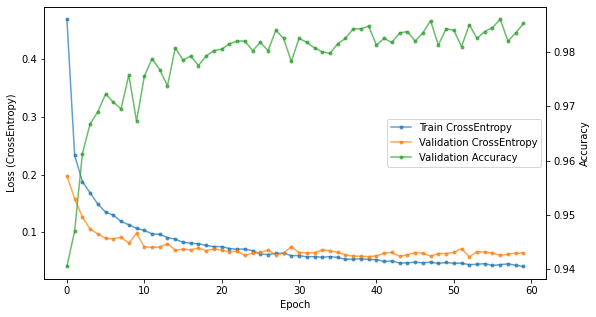

In [ ]:
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
hTrainLoss, = ax1.plot(range(NUM_EPOCHS), epoch_data['train_loss'], alpha=0.7, marker='.', color='tab:blue')
hValidLoss, = ax1.plot(range(NUM_EPOCHS), epoch_data['eval_loss'], alpha=0.7, marker='.', color='tab:orange')

ax2 = ax1.twinx()
hValidAcc, = ax2.plot(range(NUM_EPOCHS), epoch_data['eval_acc'], alpha=0.7, marker='.', color='tab:green')

ax1.set_ylabel('Loss (CrossEntropy)')
ax1.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.legend(
  [hTrainLoss, hValidLoss, hValidAcc],
  ['Train CrossEntropy','Validation CrossEntropy','Validation Accuracy'],
  loc='center right',
)
plt.show()

In [ ]:
model = M2()
model.load_state_dict(torch.load("models_m2/epoch_039.pt"))
model.eval()
model.to(DEVICE)

testing_data = get_data(data_test)
loader_test = torch.utils.data.DataLoader(testing_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

false_classification = []

test_loss = 0.0
test_acc = 0
    
for inputs, labels in loader_test:
    inputs = inputs.to(DEVICE)
    labels = labels.to(DEVICE)

    # forward
    out = model(inputs)
    out = out.view(-1, 10)
    t_loss = loss_fn(out, labels)
    test_loss += t_loss.item()*inputs.size(0)
        
    # calculate predictions & accuracy
    _, pred = torch.max(out, 1)
    test_acc += torch.sum(pred == labels)

    preds = (pred == labels)
    for x in range(len(preds)):
        if not preds[x]:
            img = inputs[x].view(-1, 28).cpu().numpy()
            correct_label = labels[x]
            wrong_label = pred[x]
            false_classification.append((img, correct_label, wrong_label))

# calculate data
test_loss = test_loss/len(loader_test.dataset)
test_acc = test_acc/len(loader_test.dataset)

print('-'*10, f'Epoch {37:<3}', '-'*10)
print(f'Test Loss:  {test_loss:.4f}')
print(f'Test Acc:   {test_acc:.4f} ({len(false_classification)}/{len(loader_test.dataset)} bad)')

---------- Epoch 37  ----------
Test Loss:  0.0526
Test Acc:   0.9853 (88/6000 bad)


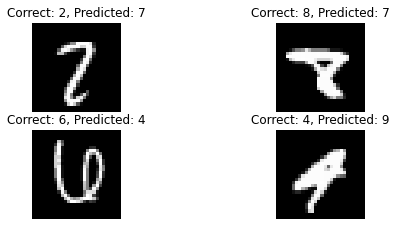

In [ ]:
# Visualize the predictions
figure = plt.figure(figsize=(8, len(false_classification)))

columns = 2
rows = len(false_classification) / 2 + 1
ax = []

for ind, (img, correct_label, wrong_label) in list(enumerate(false_classification))[:4]:
    ax.append( figure.add_subplot(rows, columns, ind+1) )
    ax[-1].set_title(f'Correct: {correct_label}, Predicted: {wrong_label}')
    ax[-1].axis("off")
    plt.imshow(img)


plt.show()

### 2.2.6: Summary

We first started with 4 fully connected layers. The images were then flattened to 1x784 and used as input for the model. After we notice the overfitting in the model, we added dropout layers in between. With this, the model was able to train for much larger number of epochs and the accuracy increased. The final result scores an accuracy of 98.53% which means, that it missclassified 88 out of 6000 images.

The instances in which the model misclassified are somewhat degenerated inputs and therefore we do not consider this model to be faulty.

## 2.3: Model [M3] (Neural Networks): Convolution (25 points)

Model architecture and parameters were inspired from [this tutorial](https://www.kaggle.com/jcardenzana/mnist-pytorch-convolutional-neural-nets) and were reworked by us to maximize performance.



### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

In [ ]:
torch.manual_seed(0)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Running on', DEVICE)
BATCH_SIZE = 64
NUM_EPOCHS = 150
LEARNING_RATE = 0.0005

conv_block_defs = [
  {'kernel': 5, 'kernel_stride': 1, 'pool_stride': 2, 'dropout': 0.2, 'channels_out': 32},
  {'kernel': 3, 'kernel_stride': 1, 'pool_stride': 2, 'dropout': 0.2, 'channels_out': 64},
  {'kernel': 3, 'kernel_stride': 1, 'pool_stride': 2, 'dropout': 0.2, 'channels_out': 64},
]
dense_block_defs = [
  {'out': 512, 'dropout': 0.2},
  {'out': 256, 'dropout': 0.2},
  {'out': 256, 'dropout': 0.2},
  {'out':  10, 'dropout': 0.2},
]


Running on cuda


### 2.3.2: Data Preprocessing


In [ ]:
transform_augmn = transforms.Compose([
  transforms.RandomAffine(
      degrees=35,
      translate=(0.2, 0.2),
      scale=(0.85, 1.15),
      # resample=PIL.Image.BICUBIC
  ),
  transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,)),
])
data_augmn = list(torchvision.datasets.MNIST('.', train=True, download=True, transform=transform_augmn))
AUGMENTED_FRAC = 0.2
data_augmn = data_test[:int(len(data_augmn)*AUGMENTED_FRAC)]

def get_data_loader(data):
  return torch.utils.data.DataLoader(data, shuffle=True, batch_size=BATCH_SIZE, num_workers=0)

loader_train = get_data_loader(data_train+data_augmn)
loader_valid = get_data_loader(data_valid)
loader_test  = get_data_loader(data_test)

### 2.3.3: Model

Define your model here

In [ ]:
class M3(nn.Module):
    def conv_block_size(self, width, kernel, padding, kernel_stride, pool_stride, dropout, **kwargs):
      return (1+(width - kernel + (2*padding)) / kernel_stride) // pool_stride

    def conv_block(self, channels_in, channels_out, kernel, padding, kernel_stride, pool_stride, dropout, **kwargs):
        return [
          nn.Conv2d(channels_in, channels_out, kernel, stride=kernel_stride, padding=padding),
          nn.ReLU(),
          nn.MaxPool2d(pool_stride, pool_stride),
          nn.Dropout(p=dropout)
        ]

    def __init__(self):
        super(M3, self).__init__()

        # convolution segment
        layers = []
        self.channels = 1
        conv_width = 28
        for conv_block_def in conv_block_defs:
          conv_block_def['channels_in'] = self.channels
          self.channels = conv_block_def['channels_out']
          conv_block_def['width'] = conv_width
          # width and height get padded from both sizes, this preserves the original dimensions
          conv_block_def['padding'] = conv_block_def['kernel'] // 2
          layers += self.conv_block(**conv_block_def)          
          conv_width = self.conv_block_size(**conv_block_def)
          
        out_connections = int(conv_block_defs[-1]['channels_out']*conv_width * conv_width)
        
        self.between_block_connections = out_connections
        self.block_1 = nn.Sequential(*layers)
        
        # dense segment
        layers = []
        for dense_block_def in dense_block_defs:
          layers.append(nn.Dropout(p=dense_block_def['dropout']))
          layers.append(nn.Linear(out_connections, dense_block_def['out']))
          out_connections = dense_block_def['out']

        self.block_2 = nn.Sequential(*layers)

    def forward(self, x):
      x = self.block_1(x)
      x = torch.flatten(x, start_dim=1)
      x = self.block_2(x)
      return x

model = M3().to(DEVICE)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

### 2.3.4: Fit Model


In [ ]:
# Training
epoch_data = {
    'valid_loss': [],
    'train_loss': [],
    'valid_acc': [],
    'train_acc': []
}
valid_acc_max = 0

if not os.path.exists('models_m3'):
  os.makedirs('models_m3')

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    valid_loss = 0.0
    valid_acc  = 0
    
    # train
    model.train()
    for data, target in loader_train:
        data   = data.to(DEVICE)
        target = target.to(DEVICE)
        
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)

    # validate
    model.eval() # turns e.g. dropout off
    for data, target in loader_valid:
        data   = data.to(DEVICE)
        target = target.to(DEVICE)

        output = model(data)
        loss = loss_func(output, target)
        
        # calculate predictions & accuracy
        _, pred = torch.max(output, 1)
        valid_acc += torch.sum(pred == target)
        valid_loss += loss.item()*data.size(0)
    
    # calculate metrics
    invalid_count = len(loader_valid.dataset) - valid_acc
    train_loss = train_loss/len(loader_train.dataset)
    valid_loss = valid_loss/len(loader_valid.dataset)
    valid_acc  = valid_acc/len(loader_valid.dataset)

    # store metrics
    epoch_data['train_loss'].append(train_loss)
    epoch_data['valid_loss'].append(valid_loss)
    epoch_data['valid_acc'].append(valid_acc)
    epoch_data['train_acc'].append(valid_acc)
       
    # print epoch statistics 
    print('-'*10, f'Epoch {epoch:<2}', '-'*10)
    print(f'Training/Validation Loss:   {train_loss:.4f}/{valid_loss:.4f}')
    print(f'Validation Acc:             {valid_acc:.4f} ({invalid_count:>3} bad)')

    # save model if validation loss has decreased
    if valid_acc >= valid_acc_max:
        print(f'Saving ({valid_acc:.6f} >= {valid_acc_max:.6f})')
        torch.save(model.state_dict(), f'models_m3/epoch_{epoch:03}.pt')
        valid_acc_max = valid_acc

---------- Epoch 0  ----------
Training/Validation Loss:   0.2665/0.0604
Validation Acc:             0.9820 ( 72 bad)
Saving (0.982000 >= 0.000000)
---------- Epoch 1  ----------
Training/Validation Loss:   0.0950/0.0395
Validation Acc:             0.9860 ( 56 bad)
Saving (0.986000 >= 0.982000)
---------- Epoch 2  ----------
Training/Validation Loss:   0.0765/0.0323
Validation Acc:             0.9890 ( 44 bad)
Saving (0.989000 >= 0.986000)
---------- Epoch 3  ----------
Training/Validation Loss:   0.0661/0.0281
Validation Acc:             0.9910 ( 36 bad)
Saving (0.991000 >= 0.989000)
---------- Epoch 4  ----------
Training/Validation Loss:   0.0621/0.0341
Validation Acc:             0.9880 ( 48 bad)
---------- Epoch 5  ----------
Training/Validation Loss:   0.0549/0.0243
Validation Acc:             0.9910 ( 36 bad)
Saving (0.991000 >= 0.991000)
---------- Epoch 6  ----------
Training/Validation Loss:   0.0531/0.0281
Validation Acc:             0.9905 ( 38 bad)
---------- Epoch 7  ----

### 2.3.5: Evaluation

<!-- Evaluate your model.

  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model -->

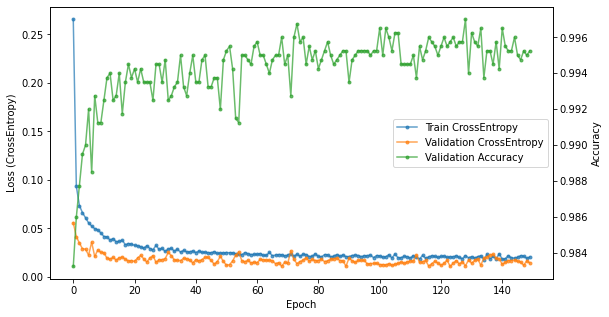

In [ ]:
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
hTrainLoss, = ax1.plot(range(NUM_EPOCHS), epoch_data['train_loss'], alpha=0.7, marker='.', color='tab:blue')
hValidLoss, = ax1.plot(range(NUM_EPOCHS), epoch_data['valid_loss'], alpha=0.7, marker='.', color='tab:orange')

ax2 = ax1.twinx()
hValidAcc, = ax2.plot(range(NUM_EPOCHS), epoch_data['valid_acc'], alpha=0.7, marker='.', color='tab:green')

ax1.set_ylabel('Loss (CrossEntropy)')
ax1.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.legend(
  [hTrainLoss, hValidLoss, hValidAcc],
  ['Train CrossEntropy','Validation CrossEntropy','Validation Accuracy'],
  loc='center right',
)
plt.show()

Validation having lower loss than training data can be explained mostly by the usage of dropout, which is not active during inference time.

It is very difficult to choose the _best_ epoch, because the variation is still quite high, but rolling average plateaus.

In [ ]:
model = M3()
model.load_state_dict(torch.load("models_m3/epoch_128.pt"))
model.eval()
model.to(DEVICE)

test_loss = 0.0
test_acc  = 0
misclassified = []

for data, target in loader_test:
    data   = data.to(DEVICE)
    target = target.to(DEVICE)

    output = model(data)
    loss = loss_func(output, target)
    
    # calculate predictions & accuracy
    _, pred = torch.max(output, 1)
    test_acc += torch.sum(pred == target)
    test_loss += loss.item()*data.size(0)
    wrong_indicies = (pred != target).nonzero(as_tuple=True)[0]
    wrong_data = data[wrong_indicies]
    wrong_labels = target[wrong_indicies]
    wrong_labels_out = pred[wrong_indicies]
    misclassified += zip(wrong_data, wrong_labels, wrong_labels_out)
    
# calculate metrics
invalid_count = len(loader_test.dataset) - test_acc
test_loss = test_loss/len(loader_test.dataset)
test_acc  = test_acc/len(loader_test.dataset)

print('-'*10, f'Epoch {109:<3}', '-'*10)
print(f'Test Loss:  {test_loss:.4f}')
print(f'Test Acc:   {test_acc:.4f} ({invalid_count:>3}/{len(loader_test.dataset)} bad)')


---------- Epoch 109 ----------
Test Loss:  0.0010
Test Acc:   0.9998 (  1/6000 bad)


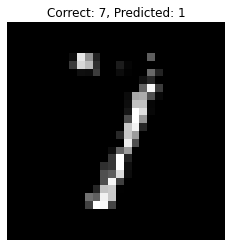

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(misclassified[0][0].cpu().numpy().squeeze())
plt.title(f'Correct: {misclassified[0][1]}, Predicted: {misclassified[0][2]}')
_ = plt.axis('off')

### 2.3.6: Summary

We started with a model architecture and parameters from the aforementioned tutorial. This model was however overfitting and had unnecessarily large capacity (3x2 large convolutions, 3 pooling layers), so we scaled it down. 
What really helped was the introduction of data augmentation. Not only did it help against overfitting, but in general it is quite easy to synthesize new data for this task. The question then became how much data augmentation should we allow and how much should the data be augmented in the first place. After a few runs, we settled on 20% of synthesized data.

Interestingly enough, when bicubic resampling was turned on, the performance dropped, so we kept it at nearest neighbor resampling. This is interesting, because the synthetized images are recognizable from the original data. 

We thought about adding label smoothing and extra residual connections, but label smoothing is not guaranteed to improve the performance and residual connections are not that important here as the convolution blocks are quite small. 

The final model achieved 99.98% accuracy. The only example it mislabeled is  shown above. This seems  something that strong dropout could fix (imagine dropouts of all nodes after the pooling layer in the black region), but it did not work in this case.

We strongly suspect, that this fantastic result is solely by accident and do not claim that this model achieved almost 100% test accuracy. We estimate, that if one would compute the expected accuracy (by Leave-One-Out Cross-Validation), the result would be more close to 99.5%.

# 3. Summary (20 points)
<!-- 

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.

Which model do you recommend to perform digit classification and why?

Feel free to discuss other insightful observations. -->

We could have used cross validation for also M2 and M3 for more robust evaluation results, but that seemed to be beyond the scope of this homework. See the note on the third model. Test evaluation was run three times (once per the model author and twice by the reviewer, because we only later added seed fixation). We did not make any decisions based on the test results, therefore we do not consider them to be dirty.

|Model|Dev accuracy|Test accuracy|Traininig time|
|-|-|-|-|
|M1| 97.92% | 98.03% | 33s/config., 36 configs. + 15min final|
|M2| 98.48% | 98.53% | 10s/epoch, 60 epochs |
|M3| 99.70% | 99.98% | 9s/epoch, 150 epochs |

We did not yet explore the fragility/robustness of the models. It is then possible, that for example M1 or M2 would be more suited for critical applications. We did not apply any explainability methods and therefore can not certify, that the models are safe.

Another aspect would be the inference time and memory requirement. From this point of view, M1 is definitely the winner because of its low inference complexity. The training and inference speed was quite high _on GPU_. On CPU, the performance for M2 and M3 is much worse. For embedded devices, M1 would be our choice.

The choice depends on the requirement context. If the context is to get the highest score in a controlled environment, we would recommend M3.